11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 4s - loss: 0.0256 - accuracy: 0.8983 - val_loss: 0.0127 - val_accuracy: 0.9468 - 4s/epoch - 8ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0098 - accuracy: 0.9565 - val_loss: 0.0079 - val_accuracy: 0.9637 - 2s/epoch - 5ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0065 - accuracy: 0.9692 - val_loss: 0.0062 - val_accuracy: 0.9682 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0049 - accuracy: 0.9765 - val_loss: 0.0057 - val_accuracy: 0.9708 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0042 - accuracy: 0.9798 - val_loss: 0.0054 - val_accuracy: 0.9736 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0035 - accuracy: 0.9838 - val_loss: 0.0044 - val_accuracy: 0.9764 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0030 - accuracy: 0.9864 - val_loss: 0.0050 - val_accuracy: 0.9729 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0026 - accuracy: 0.9883 - val_loss: 0.0043 - va

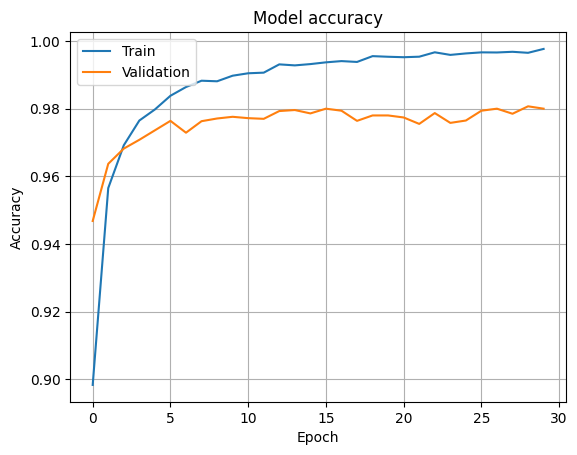

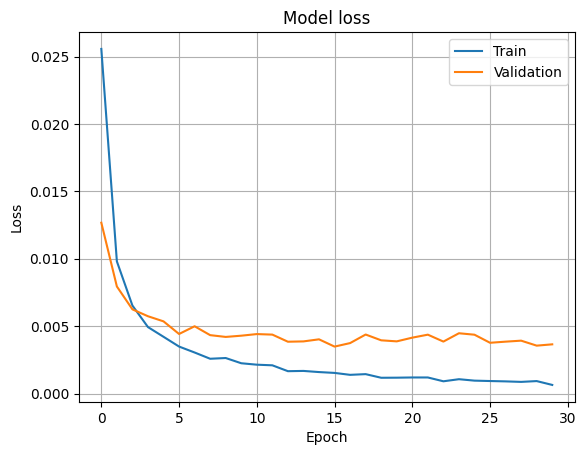

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train=x_train.astype(np.float32)/225.0
x_test=x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test= tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden1=1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output=10

# 신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

# 신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test),verbose=2)

# 신경망 정확률 측정
res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은 ", res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

# 손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()